In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [139]:
train = pd.read_csv("train.csv", index_col='PassengerId')
test = pd.read_csv("test.csv", index_col='PassengerId')
full_data = pd.concat([train, test], keys=["train", "test"],sort=True)
data_cleaner = [train, test]

In [140]:
train.head(25)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [80]:




def impute(df):
    """Impute and drop relevant variables
    
    Parameters
    ----------
    df : DataFrame of the training or test set
        Impute the median for NaNs in the Age column, mode in the Embarked
        column, and median in the Fare column.
        Drop Cabin, PassengerId, and Ticket columns in the training set.
        
    Returns
    -------
    df: Imputed DataFrame of the training or test set
    """  
       
    df['Age'].fillna(df['Age'].median(), inplace = True)
    df['Embarked'].fillna(df['Embarked'].mode(), inplace = True)
    df['Fare'].fillna(df['Fare'].median(), inplace = True)
        
#     train_set.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True) # drop from training set only
     
    return df

def feature_eng(df):
    """Create new features
    
    Parameters
    ----------
    df : DataFrame of the training or test set
        Combine siblings and parents to derive a family count.
        Create a column to determine if the person was alone or not.
        Create a Title column from Names that categorizes the title of the person.
        Bucket ticket fares into four quadrants.
        Bucket ages into 5 parts.
        
    Returns
    -------
    df: DataFrame with three additional features and two variables with bucketed values
    """    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 1
#     df['IsAlone'].loc[df['FamilySize'] > 1] = 0
    df.loc[df.FamilySize > 1, 'IsAlone'] = 0
#     df['Title'] = df['Name'].str.split(". ", expand=True)[1].str.split(".", expand=True)[0]
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
    df['Title'] = df.Title.replace(['Master', 'Don', 'Rev', 'Dr','Major', 'Lady', 'Sir','Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df.Title.replace('Mme', 'Mrs')
    df['Title'] = df.Title.replace('Ms', 'Miss')
    df['Title'] = df.Title.replace('Mlle', 'Miss')
    df['Fare'] = pd.qcut(df['Fare'], 4)
    df['Age'] = pd.cut(df['Age'], 5)
    
    return df

def encode(df):
    """Encode (factorize) the data
    
    Parameters
    ----------
    df : DataFrame of the training or test set
        Use LabelEncoder to encode five variables for charting purposes and for the RandomForestClassifier
        
    Returns
    -------
    df: DataFrame with the below five variables now encoded 
    """  
    label = LabelEncoder()
    
    df['Sex'] = label.fit_transform(df['Sex'])
    df['Embarked'] = label.fit_transform(df['Embarked'].astype(str))
    df['Title'] = label.fit_transform(df['Title'])
    df['Age'] = label.fit_transform(df['Age'].astype(str))
    df['Fare'] = label.fit_transform(df['Fare'])
    
    return df



train_set = (train
#      .drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=False)
     .pipe(impute)
     .pipe(feature_eng)
     .pipe(encode))

test_set = (test
     .pipe(impute)
     .pipe(feature_eng)
     .pipe(encode))

titanic = (full_data
     .pipe(impute)
     .pipe(feature_eng)
     .pipe(encode)
     .drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=False))


In [81]:
titanic.head(20)


Age  Embarked  Fare  Parch  Pclass  Sex  SibSp  Survived  \
      PassengerId                                                             
train 1              1         2     0      0       3    1      1       0.0   
      2              2         0     3      0       1    0      1       1.0   
      3              1         2     1      0       3    0      0       1.0   
      4              2         2     3      0       1    0      1       1.0   
      5              2         2     1      0       3    1      0       0.0   
      6              1         1     1      0       3    1      0       0.0   
      7              3         2     3      0       1    1      0       0.0   
      8              0         2     2      1       3    1      3       0.0   
      9              1         2     1      2       3    0      0       1.0   
      10             0         0     2      0       2    0      1       1.0   
      11             0         2     2      1       3    0      1       1.0   
      12             3         2     2      0       1    0      0       1.0   
      13             1         2     1      0       3    1      0       0.0   
      14             2         2     2      5       3    1      1       0.0   
      15             0         2     0      0       3    0      0       0.0   
      16             3         2     2      0       2    0      0       1.0   
      17             0         1     2      1       3    1      4       0.0   
      18             1         2     1      0       2    1      0       1.0   
      19             1         2     2      0       3    0      1       0.0   
      20             1         0     0      0       3    0      0       1.0   

                   FamilySize  IsAlone  Title  
      PassengerId                              
train 1                     2        0      1  
      2                     2        0      2  
      3                     1        1      0  
      4                     2        0      2  
      5                     1        1      1  
      6                     1        1      1  
      7                     1        1      1  
      8                     5        0      3  
      9                     3        0      2  
      10                    2        0      2  
      11                    3        0      0  
      12                    1        1      0  
      13                    1        1      1  
      14                    7        0      1  
      15                    1        1      0  
      16                    1        1      2  
      17                    6        0      3  
      18                    1        1      1  
      19                    2        0      2  
      20                    1        1      2

In [102]:
df = (titanic.loc['train']
      .drop(['Survived'], axis=1))
y = titanic.loc['train']['Survived']

print(df.shape, y.shape)



(891, 10) (891,)


PassengerId
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    1.0
Name: Survived, dtype: float64

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(623, 10) (623,)
(268, 10) (268,)


In [136]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100)

model = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(y_pred)

[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0.]


In [135]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7947761194029851


In [83]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [85]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
full_data.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
211,35.0,NaN,S,21.0000,"Cameron, Miss. Clear Annie",0,212,2,female,0,1.0,F.C.C. 13528
180,NaN,NaN,S,69.5500,"Sage, Miss. Constance Gladys",2,181,3,female,8,0.0,CA. 2343
294,36.0,NaN,S,9.5000,"Wittevrongel, Mr. Camille",0,1186,3,male,0,NaN,345771
282,16.0,NaN,S,9.5000,"de Pelsmaeker, Mr. Alfons",0,283,3,male,0,0.0,345778
451,NaN,NaN,S,19.9667,"Hagland, Mr. Ingvald Olai Olsen",0,452,3,male,1,0.0,65303
158,42.0,D22,S,26.5500,"Borebank, Mr. John James",0,1050,1,male,0,NaN,110489
165,9.0,NaN,S,20.5250,"Goldsmith, Master. Frank John William ""Frankie""",2,166,3,male,0,1.0,363291
191,NaN,NaN,S,26.0000,"Salomon, Mr. Abraham L",0,1083,1,male,0,NaN,111163
758,34.0,NaN,S,8.0500,"Theobald, Mr. Thomas Leonard",0,759,3,male,0,0.0,363294
265,NaN,NaN,S,7.8958,"Lyntakoff, Mr. Stanko",0,1157,3,male,0,NaN,349235


In [5]:
full_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [70]:
for row in data_cleaner:
    row['Age'].fillna(row['Age'].median(), inplace = True)
    
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [83]:
full_data.info()
full_data['Age'] = lambda x: x['Age'].fillna(x['Age'].median(), inplace = True)
full_data['Embarked'] = lambda x: x['Embarked'].fillna(x['Embarked'].mode(), inplace = True)
full_data['Fare'] = lambda x: x['Fare'].fillna(x['Fare'].median(), inplace = True)
full_data.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)
full_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null object
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null object
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 132.9+ KB


Age           0
Embarked      0
Fare          0
Name          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
dtype: int64

In [96]:
for dataset in [train, test]:

    
    dataset['Age']      = lambda x: x['Age'].fillna(x['Age'].median(), inplace = True)
    dataset['Embarked'] = lambda x: x['Embarked'].fillna(x['Embarked'].mode(), inplace = True)
    dataset['Fare']     = lambda x: x['Fare'].fillna(x['Fare'].median(), inplace = True)
train.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

print("Training set:\n",train.isnull().sum())
print("-" * 10)
print("Test set:\n",test.isnull().sum())

train set
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
test set
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [84]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
train.shape

(891, 12)

In [81]:
train.size

10692

In [65]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
train.isnull().sum()

# there is a huge % of Cabin missing from the dataset. I think the best thing to do with this is drop it entirely

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [87]:
train.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [73]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [74]:
train.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
# mark train.Age's zero values as NaN
train[['Age']] = train[['Age']].replace(0, np.NaN)

In [58]:
# fill NaN values with mean column values
train.fillna(train.mean(), inplace=True)

In [59]:
# recount NaN's
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
len(train.columns)

12

In [9]:
len(test.columns)

11

In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
train[['Fare', 'Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
full_data = pd.concat([train, test], sort=True)
full_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [54]:
# looks like PassengerId is a drop
full_data.PassengerId.value_counts().head()

1309    1
449     1
431     1
432     1
433     1
Name: PassengerId, dtype: int64

In [8]:
# drop candidate
full_data.Ticket.value_counts()

CA. 2343         11
1601              8
CA 2144           8
347077            7
PC 17608          7
3101295           7
347082            7
S.O.C. 14879      7
113781            6
382652            6
347088            6
19950             6
PC 17757          5
16966             5
349909            5
113503            5
220845            5
W./C. 6608        5
4133              5
PC 17760          4
2666              4
C.A. 34651        4
230136            4
PC 17483          4
17421             4
C.A. 2315         4
12749             4
SC/Paris 2123     4
113760            4
LINE              4
                 ..
PC 17594          1
2697              1
3701              1
113038            1
330924            1
349206            1
349242            1
368323            1
19947             1
113783            1
347076            1
PC 17591          1
3101264           1
680               1
345771            1
349232            1
C.A. 15185        1
315097            1
W./C. 14263       1


In [58]:
# cabin has too much missing data, will drop
full_data.Cabin.value_counts().head()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
C78                4
Name: Cabin, dtype: int64

In [52]:
# looks like most people embarked from Southampton, C = Cherbourg, Q = Queenstown
full_data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [9]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train['IsAlone'] = 1
train['IsAlone'].loc[train['FamilySize'] > 1] = 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [15]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [17]:
# bucket Fare and Age
train['FareBin'] = pd.qcut(train['Fare'], 4)
train['AgeBin'] = pd.cut(train['Age'],5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,None,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,None,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,None,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,None,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,None,1,1,3101298,12.2875,NaN,S


In [50]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
def dummies(df):
    """Create dummy variables for the pertinent features
    
    Parameters
    ----------
    df : DataFrame of the training or test set
        Use pd to encode four variables for charting purposes
        
    Returns
    -------
    df: DataFrame with four additional encoded variables
    """  
    
    

In [31]:
titanic.head()


Age Cabin  Embarked  Fare  \
      PassengerId                              
train 1              1   NaN         2     0   
      2              2   C85         0     3   
      3              1   NaN         2     1   
      4              2  C123         2     3   
      5              2   NaN         2     1   

                                                                Name  Parch  \
      PassengerId                                                             
train 1                                      Braund, Mr. Owen Harris      0   
      2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0   
      3                                       Heikkinen, Miss. Laina      0   
      4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0   
      5                                     Allen, Mr. William Henry      0   

                   Pclass  Sex  SibSp  Survived            Ticket  FamilySize  \
      PassengerId                                                               
train 1                 3    1      1       0.0         A/5 21171           2   
      2                 1    0      1       1.0          PC 17599           2   
      3                 3    0      0       1.0  STON/O2. 3101282           1   
      4                 1    0      1       1.0            113803           2   
      5                 3    1      0       0.0            373450           1   

                   IsAlone  
      PassengerId           
train 1                  1  
      2                  1  
      3                  1  
      4                  1  
      5                  1

In [8]:
print(" Original train and test shape: ", train.shape, test.shape, '\n',
     "Transformed train and test shape: ", train_set.shape, test_set.shape)

 Original train and test shape:  (891, 12) (418, 19) 
 Transformed train and test shape:  (891, 16) (418, 19)


In [9]:
train_set.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'FareBin', 'AgeBin', 'Sex_encode',
       'Embarked_encode', 'AgeBin_encode', 'FareBin_encode'],
      dtype='object')

In [11]:
train.Pclass

0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [13]:
Target = ['Survived']

train_set_x = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']


train_set_xcode = ['Sex_encode', 'Pclass', 'Embarked_encode', 'SibSp', 'Parch', 'Age', 'Fare']

train_set_xy = Target + train_set_x


train_set_xbin = ['Sex_encode','Pclass', 'Embarked_encode', 'FamilySize', 'AgeBin_encode', 'FareBin_encode']
train_set_xy_bin = Target + train_set_xbin

train_set_dummy = pd.get_dummies(train_set[train_set_x])
train_set_xdummy = train_set_dummy.columns.tolist()
train_set_xy_dummy = Target + train_set_xdummy

print('DUMMY X Y: ', train_set_xy_dummy)
train_set_dummy.head()

DUMMY X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,7.2500,2,1,0,1,0,0,1
1,1,1,0,38.0,71.2833,2,1,1,0,1,0,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1
3,1,1,0,35.0,53.1000,2,1,1,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1


In [14]:
X = train_set[train_set_xcode]
Xbin = train_set[train_set_xbin]
Xdummy = train_set_dummy[train_set_xdummy]
y = train_set[Target]

trainx, trainy, testx, testy = train_test_split(X, y, test_size=0.3)

trainx_bin, trainy_bin, testx_bin, testy_bin = train_test_split(X, y, test_size=0.3)

trainx_dummy, trainy_dummy, testx_dummy, testy_dummy = train_test_split(X, y, test_size=0.3)


print("Data1 Shape: {}".format(train_set.shape))
print("Train1 Shape: {}".format(trainx.shape))
print("Test1 Shape: {}".format(testx.shape))



Data1 Shape: (891, 16)
Train1 Shape: (623, 7)
Test1 Shape: (623, 1)


In [15]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(trainx, trainy)

y_pred=clf.predict(testx)

ValueError: Unknown label type: 'continuous-multioutput'

In [68]:
#===========================================================================================================================
# DIABETES AND IRIS DATA TESTING BELOW
#===========================================================================================================================


from sklearn import datasets, linear_model
cols = 'age sex bmi map tc ldl hdl tch lts glue'.split()
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=cols)
y = diabetes.target

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353,) (89, 10) (89,)


Text(0,0.5,'Predicted Values')

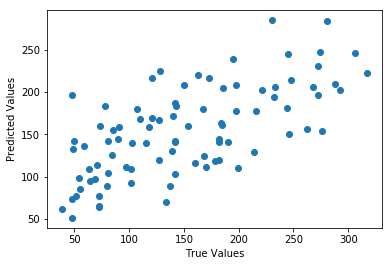

In [70]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")



In [81]:
print('Score:', model.score(X_test, y_test))

Score: 0.445213782001895


In [75]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# 6fold cv
scores = cross_val_score(model, df, y, cv=6)
print('cross validated scores:', scores)

cross validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


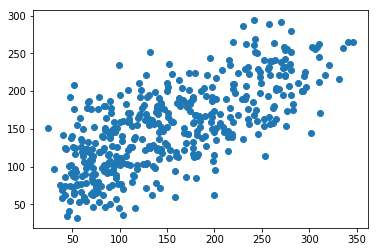

In [78]:
predictionscv = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictionscv)

In [80]:
accuracy = metrics.r2_score(y, predictionscv)
print('cross-predicted accuracy: ', accuracy)

#===========================================================================================================================
# END DIABETES AND IRIS DATA TESTING 
#===========================================================================================================================


cross-predicted accuracy:  0.4908065838640775
